# Introduction to GPS Tracking of Bird

In [1]:
import pandas as pd

In [4]:
birddata = pd.read_csv("Bird/bird_tracking.csv")
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


In [5]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


# Simple Data Visualizations

In [6]:
import matplotlib.pyplot as plt
import numpy as np

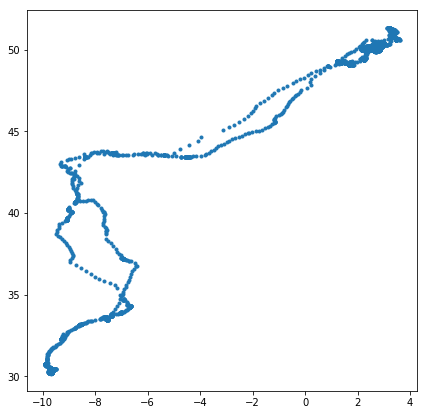

In [13]:
ix = birddata.bird_name == "Eric"
x, y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x,y, ".");

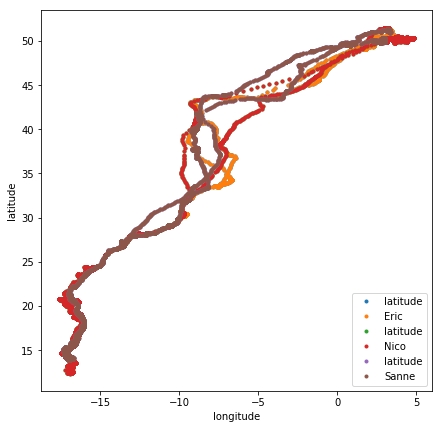

In [18]:
bird_names = pd.unique(birddata.bird_name)
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y, ".");
    plt.plot(x,y,".",label=bird_name )
    
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

# Examining Flight Speed

In [25]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
spee[:10]

In [26]:
np.isnan(speed).any()

True

In [27]:
sum(np.isnan(speed))

85

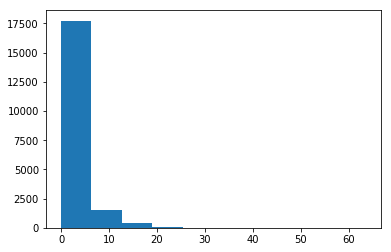

In [33]:
ind = np.isnan(speed)
plt.hist(speed[~ind])
plt.savefig("hist.pdf")

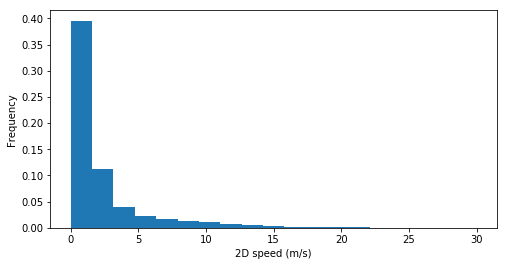

In [34]:
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[birddata.bird_name == 'Eric']
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0,30,20), normed=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");

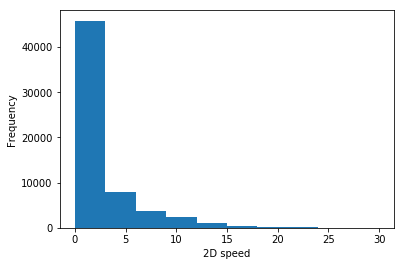

In [36]:
birddata.speed_2d.plot(kind='hist', range=[0, 30])
plt.xlabel("2D speed");
plt.savefig('pd_hist.pdf')

Using panda to display histogram, we do not have to deal with Nan

# Using Datetime

In [39]:
import datetime
birddata.columns

Index(['altitude', 'date_time', 'device_info_serial', 'direction', 'latitude',
       'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [38]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [40]:
datetime.datetime.today()

datetime.datetime(2018, 3, 26, 16, 23, 40, 235515)

In [48]:
time_1 = datetime.datetime.today()

In [49]:
time_2 = datetime.datetime.today()
time_2 - time_1

datetime.timedelta(0, 2, 124000)

In [51]:
date_str = birddata.date_time[0]
type(date_str)

str

In [52]:
date_str

'2013-08-15 00:18:08+00'

In [54]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [55]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [57]:
timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [58]:
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

In [59]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [60]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [65]:
times = birddata.timestamp[birddata.bird_name =="Eric"]
elapsed_time = [time - times[0] for time in times]
elapsed_time[0:10]

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34'),
 Timedelta('0 days 02:29:30'),
 Timedelta('0 days 02:44:25'),
 Timedelta('0 days 02:59:19'),
 Timedelta('0 days 03:14:27'),
 Timedelta('0 days 03:29:40')]

In [67]:
print(elapsed_time[1000] / datetime.timedelta(days=1))
print(elapsed_time[1000] / datetime.timedelta(hours=1))

12.084722222222222
290.03333333333336


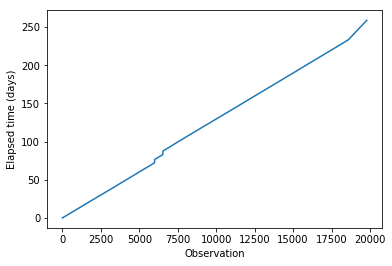

In [69]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");

# Calculating Daily Mean Speed

In [74]:
data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)
next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []
        
        

Text(0,0.5,'Mean speed (m/s)')

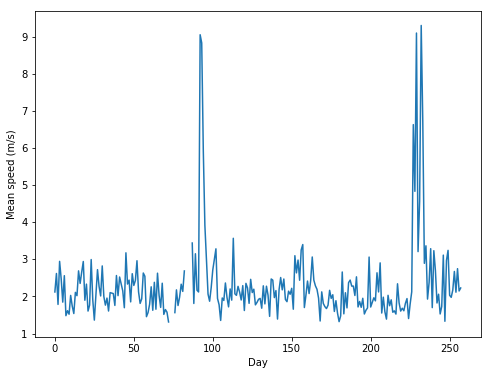

In [77]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")

Migration pics

# Using the Cartopy Library

In [92]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ModuleNotFoundError: No module named 'cartopy'